# Stage 4: Where do I find the data?

This is data science and data analysis after all. We need data. And when we have data, we need to know what data we have. Here are the big questions around finding and prepping data:
* Where do I find the data?
* How can I use the data?
* How do I know that I have the right data?
* **BONUS** How can I make it easy to retrieve and use again? (Without copy and pasting code)

### Imagine: a hypothetical workflow for downloaded data 
(Assuming you're using reproducible environments already!)

1. **Downloading data**: First, you look for a dataset to use. You get one. You download the data, or you copy and paste a script you find off of the internet for how to download the data. 
2. **Data prep**: Then you copy and paste the munging script that you saw for how to get it into a pandas dataframe.
3. **Data prep-2**: You try some analysis, but it doesn't quite work, you need to clean the data up a bit more, so you go back to doing some more prep, this time, your own way. 
4. **Analysis**: Finally, you can run your analysis and do some data science work. 
5. ...time passes...
6. **Re-downloading**: You mention the result and a colleague asks you about the work, so you go back to dig up the code. You decide to see if you can share your work. You start to run your code, but then realize that the dataset has been updated. It's not clear what's been changed, but you notice in the output that there seem to be more entries in the dataframe. When your script downloaded it, you replaced the previous dataset with the new one. 
7. **Checking licenses**: When you go to try and figure out what happened, and start looking up info on the dataset. The source you used for information the first time doesn't seem to be up-to-date so you keep digging until you find the original source. In the process, you realize you forgot to look at the license. Better check on that before sharing your work. Thankfully, it's CC-BY-NC, and you're not using it for work purposes. You take a sigh of relief, as this could have been a show-stopper, and you continue.
8. **Data prep-3**: You can't roll back to the old data, and the new data has some new gotchas, so you spend some time trying to sort that out. Finally you have something that you can re-run your analysis on, and share with your colleague. 
9. **Analysis-2**: Fingers crossed with the new larger dataset that things work our roughly the same. There's no easy way now to figure out what's going on if the results look different from before...
10. **Sharing**: Phew. Wiping the sweat from your brow, things look roughly similar. You can pass on the work to your colleague.

In the hypothetical (or not...this may be pulling from personal experience) situation above, getting to the analysis stage the second time around took just as long, if not longer because of trying to figure out what had changed about the dataset, and tracking down the dataset information and licenses, which were no longer as easy to find.

### Some Reproducibility issues
In the previous workflow, here were some of the issues that made it hard to reproduce:

* **NO-DATA-LICENSE**: No data license with the data. In fact, we forgot to even check the first time. It wasn't a showstopper, this time, but it could have easily been.
* **NO-DATA-METADATA**: No metadata with the data. We didn't have a description of what the data was in a way that made it easy to see what the data was. And in this case, what might have changed with the new metadata.
* **NO-DATA-HASH**: No data hash. This meant that there was no way to catch early on that the data was different. 
* **COOKED-DATA**: Data gets cooked when it gets changed. In this case, the change was downloading the new data on top of the old. Most frequently, we see this happening when data that gets preped gets saved over the raw data. Repeat after me: "Data is immutable".
* **BLACK-MAGIC**: The data prep was a form of black magic. In this example, we copied and pasted, and we didn't pay attention to what was inside it, it just worked the first time. In particular, the download script had a hard-coded path that the download went to and it would redownload the file into the same place every time. 


### Default Better Principles

* **Data and metadata always stay together**: Keep your data and your metadata together at all times. This includes licenses and hashes. 
* **Keep a hash of your data and check it**: This is especially true for your raw data, your starting points from which the rest of your data is derived.
* **Data is immutable**: Never edit a raw data file. Especially not manually. Don't overwrite your raw data. Don't save multiple versions of the raw data. Treat the data (and its format) as immutable. 
* **Keep (easy-to-use) data recipes**: The code you write should move the raw data through a pipeline to your final analysis. Keep data recipes as a way of recovering your data from its raw format. Your data recipe ideally has an easy-to-use API that gives people you're sharing with a *common start line* when working with the data from a relatively cleaned up state.

## The Easydata Way: `Dataset.load("my-dataset-name")`

**Your Next Tasks in the Reproducibility Quest**
* Load a dataset from the catalog
* Generate and save some derived datasets back to the catalog

Now we'll take a look at how we do this in Easydata. First, some imports that we'll need.

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
from src.data import Dataset
import logging
from src.log import logger
from src.helpers import notebook_as_transformer

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

### Set to debug log level

Easydata makes extensive use of python's excellent logging framework to let you know what is going on under the hood.

Because this is a tutorial, let's set the log level for these messages to DEBUG to see what the Dataset code is doing under the hood. These messages will show up in pink when the notebook runs.

If you find this output to be too noisy later on, you can always change the log level to something quieter, like `logging.INFO`.

In [4]:
logger.setLevel(logging.DEBUG)

## Dataset objects

#### Default Better Principle: Data and metadata always stay together
The Dataset object has metadata attached to it. By **default** Dataset objects keep their metadata with them at all times.

In [5]:
ds = Dataset.load("dataset-challenge")

2024-03-29 18:59:28,186 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2024-03-29 18:59:28,187 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2024-03-29 18:59:28,189 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:28,190 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:28,191 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2024-03-29 18:59:28,191 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2024-03-29 18:59:28,193 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:28,193 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:28,195 - datasets - DEBUG - Load dataset-challenge from disk...


2024-03-29 18:59:28,196 - datasets - DEBUG - Loaded dataset-challenge from disk.


In [6]:
print(ds.DESCR)


The `.DESCR` is where Easydata keeps a description of the dataset. In this example, you'll see that we have a Dataset object container with metadata, but no data.

For this dataset, if you do a ds.data, you will return NONE. 

A basic description of the data is something that always stays with the data, Easydata uses a descr as one of its metadata fields which can be accessed via

`.DESCR`

for any Dataset object.

When you transform the data, it is nice to append new information including what has been done to the data via the transformation by appending information to the end of the `.DESCR` text.

You can add any metadata you want to ds.metdata, as it is basically a dict with a fancy wrapping paper that lets you access any key via ALL CAPS.



In [7]:
ds.data

In [8]:
print(ds.LICENSE)


CC-BY-4.0 is a common form of dataset license. Here you would put the license for your data, along with any attribution and other information necessary to keep in line with the terms included in the original license.

All data that you use should have an explicit license kept with it. To keep the license with the data, Easydata uses a license as one of its metadata fields which can be accessed via

`.LICENSE`

for any Dataset object.

For more on licenses, see the references at the end of the `04-Data-Challenge` notebook.



Penguin data
------------
<img src="https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png" alt="Penguins" width=400px/>

Time to try it out. The next step is to get some data to work with. To ease us into things
we'll start with the [penguin
dataset](https://github.com/allisonhorst/penguins). It isn't very
representative of what real data would look like, but it is small both
in number of points and number of features, and will let us quickly and easily get started.

## Load the pre-created a Dataset recipe

Here we use the dataset recipe to get the raw penguins dataset. When running 

```ds = Dataset.load('penguins-raw')```

Easydata uses an entry in the Dataset Catalog to find the `penguins-raw` Dataset recipe.

Here's what it will do:
* Look in the Catalog for the entry `penguins-raw`
* Traceback through the dependency chain of datasets looking for what's already cashed and matches the hash check, and what needs to be created from scratch
* If this is your first time running, it will download the dataset and created it the first time, populating the `data/raw` directory with the raw download
* Do a hash check
* Create the `penguins-raw` Dataset
* If successful, it will save a processed version of the data in `data/processed` for quick and easy loading any time

Say you need more space on your machine. You can blow away the contents of your `data/processed` directory at any time, and `.load("penguins-raw")` will recreate the Dataset again from `data/raw` whenever you need to use it.


In [9]:
ds = Dataset.load('penguins-raw')

2024-03-29 18:59:28,223 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2024-03-29 18:59:28,224 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2024-03-29 18:59:28,225 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:28,225 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:28,227 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2024-03-29 18:59:28,227 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2024-03-29 18:59:28,229 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:28,229 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:28,232 - datasets - DEBUG - Load penguins-raw from disk...


2024-03-29 18:59:28,233 - datasets - DEBUG - Loaded penguins-raw from disk.


#### Default Better Principle: Keep a hash of your data and check it
To see what happens with a saved cached copy, load it again. Note the hash check.

In [10]:
ds = Dataset.load('penguins-raw')

2024-03-29 18:59:28,240 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2024-03-29 18:59:28,240 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2024-03-29 18:59:28,242 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:28,242 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:28,244 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2024-03-29 18:59:28,244 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2024-03-29 18:59:28,245 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:28,246 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:28,248 - datasets - DEBUG - Load penguins-raw from disk...


2024-03-29 18:59:28,249 - datasets - DEBUG - Loaded penguins-raw from disk.


The `penguins-raw` dataset contains information on where to find a single raw data file: `penguins_size.csv`. This is the raw data. 

In [11]:
ds.EXTRA

{'penguins-raw.extra': {'penguins_size.csv': ['size:13525']}}

Normally, the hash is stored with the metadata and checked into the Dataset catalogue. Technically, it is here, with the hash of `None`.

In [12]:
ds.HASHES

{'data': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b',
 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}

For files, `.EXTRA` contains the hash information. We have the choice to store the `size` as the hash to keep giant data stores more manageable. We could also choose to use a hash function instead of `size` if we wanted to. 

In [13]:
print(ds.DESCR)


The goal of palmerpenguins is to provide a great dataset for data exploration & visualization, as an alternative to `iris`.

More information can be found at [https://github.com/allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins).

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The data consists of measurements of bill (culmen) and flippers and weights of three species of penguins, along with some other metadata about the penguins. In total we have 334 different penguins measured.


<img src="https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png" alt="Diagram of culmen measurements on a penguin" width=300px/>

In [14]:
print(ds.LICENSE)


Data are available by [CC-0](https://github.com/allisonhorst/palmerpenguins) license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.



Without going in to the details, `.EXTRA` lets us manage files off of our local system if necessary and keeps track of raw data file details for our Dataset recipes. To get the fully qualified path to `penguins_size.csv` or any `.EXTRA` file, we can use 

`.EXTRA` will always keep track of relative paths so you are never checking in anything except relative paths to your repo, while using your local paths to resolve where to find the files via `.extra_file()`.

In [15]:
ds.extra_file('penguins_size.csv')

'/Users/alex/Documents/Coding/Python/easydata-tutorial/data/processed/penguins-raw.extra/penguins_size.csv'

Let's start looking at the data

In [16]:
penguins = pd.read_csv(ds.extra_file('penguins_size.csv'))
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


First up, we will get rid of the NAs in
the data.

In [17]:
penguins = penguins.dropna()
penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

Visualizing this data is a little bit
tricky since we can't plot in 4 dimensions easily. Fortunately four is
not that large a number, so we can just to a pairwise feature
scatterplot matrix to get an ideas of what is going on. Seaborn makes
this easy.

2024-03-29 18:59:28,322 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.


2024-03-29 18:59:28,323 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,323 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,324 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.05


2024-03-29 18:59:28,324 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,325 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,325 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,325 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,326 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335


2024-03-29 18:59:28,326 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,326 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,327 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,327 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,328 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,328 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,328 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,329 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,329 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,329 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,330 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,331 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,332 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,333 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 2.335


2024-03-29 18:59:28,333 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,334 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,334 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,334 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,335 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 2.05


2024-03-29 18:59:28,335 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,336 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,336 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,336 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,337 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,337 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,338 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,338 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,339 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,339 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,340 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,340 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,340 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,341 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc', name='Seravek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,341 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Thin.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,342 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,342 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,342 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf', name='STIXVariants', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,343 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf', name='DIN Alternate', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,343 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Regular.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:28,344 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc', name='Noto Sans Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,345 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc', name='Kailasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,345 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf', name='Trattatello', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,345 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05


2024-03-29 18:59:28,346 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc', name='Waseem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,346 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc', name='PingFang HK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,347 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,348 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,349 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Heavy.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:28,350 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,350 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,350 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,351 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRunic-Regular.ttf', name='Noto Sans Runic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,351 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,352 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,352 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc', name='Rockwell', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,352 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf', name='Noto Sans Lycian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,353 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,353 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymReg.otf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,353 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,354 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,354 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,355 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,356 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,356 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,356 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,357 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,357 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungthep', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,358 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Regular.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,358 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,358 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,359 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,359 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,360 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', name='.New York', style='italic', variant='normal', weight=425, stretch='normal', size='scalable')) = 11.07375


2024-03-29 18:59:28,360 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,361 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,361 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,361 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,362 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,362 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,362 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,363 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,364 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,364 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,365 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,365 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,366 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf', name='Farisi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,366 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc', name='Noteworthy', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,367 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,367 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,368 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,368 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,368 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,369 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,369 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,369 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,370 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,370 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,371 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,371 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,371 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,372 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,372 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf', name='Noto Sans Lisu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,372 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,373 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,373 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,374 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf', name='.SF NS Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,374 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,375 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,375 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,375 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next Condensed.ttc', name='Avenir Next Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,376 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,376 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,377 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:28,377 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,378 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,378 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,378 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Bold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:28,379 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regular.ttf', name='Noto Sans NKo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,379 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc', name='Avenir Next', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,380 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,380 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,381 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,382 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,382 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,382 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc', name='Kohinoor Gujarati', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,383 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,383 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc', name='SignPainter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,384 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc', name='Avenir', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,384 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,385 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', name='Noto Sans Oriya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,385 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,385 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc', name='Marion', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,386 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc', name='PT Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,386 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,386 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,387 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,387 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactText.ttf', name='.SF Compact Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,388 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc', name='Nadeem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,388 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi Gold.ttf', name='Mishafi Gold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,389 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,389 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24


2024-03-29 18:59:28,389 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc', name='DecoType Naskh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,390 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,390 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOgham-Regular.ttf', name='Noto Sans Ogham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,391 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc', name='Farah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,391 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,391 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf', name='Luminari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,392 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535


2024-03-29 18:59:28,392 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,393 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,393 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,393 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,394 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,394 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,395 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,395 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,395 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,396 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,396 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,397 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.ttc', name='Superclarendon', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,397 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,398 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,399 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc', name='Papyrus', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,399 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,399 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf', name='Zapf Dingbats', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,400 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,400 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBol.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,401 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,401 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,402 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf', name='Noto Sans Phoenician', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,402 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,402 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,403 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Black.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725


2024-03-29 18:59:28,403 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,404 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,404 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari Sangam MN.ttc', name='Devanagari Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,405 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Semibold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,405 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,405 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,406 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Bold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,406 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,406 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf', name='Silom', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,407 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,407 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,408 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,408 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Light.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:28,409 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeueDeskInterface.ttc', name='.Helvetica Neue DeskInterface', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,409 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,409 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525


2024-03-29 18:59:28,410 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc', name='Mukta Mahee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,410 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc', name='Al Bayan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,411 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,411 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,412 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145


2024-03-29 18:59:28,412 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,412 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,413 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,413 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,414 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,415 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,415 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc', name='Mshtakan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,416 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,416 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple Chancery.ttf', name='Apple Chancery', style='normal', variant='normal', weight=0, stretch='normal', size='scalable')) = 10.43


2024-03-29 18:59:28,417 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,417 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc', name='American Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,418 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,418 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,418 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43


2024-03-29 18:59:28,419 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,419 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,420 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,420 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf', name='Noto Sans Limbu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,420 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf', name='System Font', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,421 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,421 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc', name='PT Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,422 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,422 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,422 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,423 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,423 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,424 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc', name='Chalkboard', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,424 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,424 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactTextItalic.ttf', name='.SF Compact Text', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,425 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,425 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,425 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,426 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc', name='Kohinoor Telugu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,426 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Semibold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:28,427 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25


2024-03-29 18:59:28,427 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,428 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf', name='Noto Sans Mongolian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,428 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,429 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,429 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,430 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,430 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc', name='Didot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,431 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf', name='Noto Sans Cham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,431 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', name='Noto Sans Glagolitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,432 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,432 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc', name='Helvetica', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,432 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIDisplay.ttc', name='.Arabic UI Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,433 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,433 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc', name='Athelas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,434 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf', name='Kokonor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,434 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,434 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', name='InaiMathi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,435 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf', name='Noto Sans Buginese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,435 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,436 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc', name='Noto Sans Kannada', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,436 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,436 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,437 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,437 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf', name='Noto Sans New Tai Lue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,437 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,438 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,438 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc', name='Kannada MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,439 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,439 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc', name='Sukhumvit Set', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 18:59:28,439 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,440 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc', name='Sana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,440 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,441 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,441 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,441 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,442 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,442 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,443 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-Regular.ttf', name='Noto Sans Carian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,443 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,443 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc', name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,444 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,444 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc', name='Optima', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,445 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf', name='Bradley Hand', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,445 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,445 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc', name='PT Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,446 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,446 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,447 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,447 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,448 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,449 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text.ttc', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,449 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,449 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,450 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,450 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc', name='Chalkboard SE', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,451 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc', name='Thonburi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,451 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Ultralight.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,451 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam MN.ttc', name='Malayalam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,452 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,452 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,452 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,453 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf', name='.Keyboard', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,453 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,454 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc', name='Gill Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,455 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24


2024-03-29 18:59:28,455 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,456 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', name='Noto Sans Tagbanwa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,456 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,456 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', name='Helvetica Neue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,457 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,457 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,457 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,458 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,458 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,459 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersian-Regular.ttf', name='Noto Sans Old Persian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,459 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIText.ttc', name='.Arabic UI Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,459 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf', name='Chalkduster', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,460 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf', name='Noto Sans Coptic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,460 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,460 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,461 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,461 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactDisplay.ttf', name='.SF Compact Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,462 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc', name='Copperplate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,462 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,462 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,463 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335


2024-03-29 18:59:28,464 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf', name='Noto Serif Balinese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,465 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf', name='.New York', style='normal', variant='normal', weight=425, stretch='normal', size='scalable')) = 10.07375


2024-03-29 18:59:28,465 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,466 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,466 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,467 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,467 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,467 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,468 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,468 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,469 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf', name='Noto Sans Bamum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,469 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,469 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,470 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,470 - font_manager - DEBUG - findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,471 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Heavy.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:28,471 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc', name='Galvji', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,472 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc', name='.Aqua Kana', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,472 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansShavian-Regular.ttf', name='Noto Sans Shavian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,473 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,473 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 18:59:28,474 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05


2024-03-29 18:59:28,474 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,474 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,475 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,475 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,475 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Medium.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:28,476 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc', name='Lucida Grande', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,476 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf', name='.SF Compact Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,477 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc', name='Arial Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,477 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', name='Noto Sans Cuneiform', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,478 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Light.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:28,478 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,478 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,479 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', name='Noto Sans Rejang', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,479 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,480 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,480 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,481 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc', name='Baghdad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,481 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996


2024-03-29 18:59:28,482 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to Arial ('/System/Library/Fonts/Supplemental/Arial.ttf') with score of 0.050000.


2024-03-29 18:59:28,743 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.


2024-03-29 18:59:28,744 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,744 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,745 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.05


2024-03-29 18:59:28,745 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,746 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,747 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,747 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,748 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335


2024-03-29 18:59:28,749 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,750 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,750 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,751 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,751 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,752 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,752 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,753 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,753 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,754 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,755 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,755 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,756 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,756 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 2.335


2024-03-29 18:59:28,757 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,757 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,758 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,758 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,759 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 2.05


2024-03-29 18:59:28,759 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,760 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,760 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,761 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,761 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,762 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,762 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,763 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,764 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,764 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,765 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,766 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,766 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,767 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc', name='Seravek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,767 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Thin.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,767 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,768 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,768 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf', name='STIXVariants', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,769 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf', name='DIN Alternate', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,769 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Regular.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:28,770 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc', name='Noto Sans Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,770 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc', name='Kailasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,771 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf', name='Trattatello', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,771 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05


2024-03-29 18:59:28,771 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc', name='Waseem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,772 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc', name='PingFang HK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,773 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,773 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,774 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Heavy.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:28,774 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,775 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,775 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,776 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRunic-Regular.ttf', name='Noto Sans Runic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,776 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,777 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,777 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc', name='Rockwell', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,777 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf', name='Noto Sans Lycian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,778 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,779 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymReg.otf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,779 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,779 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,780 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,780 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,781 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,782 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,782 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,783 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,783 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungthep', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,784 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Regular.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,784 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,785 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,785 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,786 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,786 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', name='.New York', style='italic', variant='normal', weight=425, stretch='normal', size='scalable')) = 11.07375


2024-03-29 18:59:28,787 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,787 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,787 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,788 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,788 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,789 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,789 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,789 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,790 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,790 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,791 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,791 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,791 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf', name='Farisi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,792 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc', name='Noteworthy', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,792 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,793 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,793 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,794 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,794 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,794 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,795 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,795 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,796 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,796 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,797 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,798 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,798 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,799 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,799 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf', name='Noto Sans Lisu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,800 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,800 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,801 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,801 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf', name='.SF NS Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,801 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,802 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,802 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,802 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next Condensed.ttc', name='Avenir Next Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,803 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,803 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,804 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:28,804 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,804 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,805 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,805 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Bold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:28,806 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regular.ttf', name='Noto Sans NKo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,806 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc', name='Avenir Next', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,807 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,807 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,808 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,808 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,808 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,809 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc', name='Kohinoor Gujarati', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,809 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,810 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc', name='SignPainter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,810 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc', name='Avenir', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,811 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,811 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', name='Noto Sans Oriya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,811 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,812 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc', name='Marion', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,812 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc', name='PT Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,813 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,813 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,814 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,814 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactText.ttf', name='.SF Compact Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,815 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc', name='Nadeem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,816 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi Gold.ttf', name='Mishafi Gold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,816 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,816 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24


2024-03-29 18:59:28,817 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc', name='DecoType Naskh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,817 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,818 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOgham-Regular.ttf', name='Noto Sans Ogham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,818 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc', name='Farah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,818 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,819 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf', name='Luminari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,819 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535


2024-03-29 18:59:28,820 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,820 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,821 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,821 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,822 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,822 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,822 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,823 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,823 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,824 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,824 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,824 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.ttc', name='Superclarendon', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,825 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,825 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,825 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc', name='Papyrus', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,826 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,826 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf', name='Zapf Dingbats', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,827 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,827 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBol.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,827 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,828 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,828 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf', name='Noto Sans Phoenician', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,829 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,829 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,830 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Black.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725


2024-03-29 18:59:28,830 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,831 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,832 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari Sangam MN.ttc', name='Devanagari Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,832 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Semibold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,833 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,833 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,834 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Bold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,834 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,834 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf', name='Silom', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,835 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,835 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,881 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,882 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Light.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:28,883 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeueDeskInterface.ttc', name='.Helvetica Neue DeskInterface', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,883 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,884 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525


2024-03-29 18:59:28,884 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc', name='Mukta Mahee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,885 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc', name='Al Bayan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,885 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,886 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,886 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145


2024-03-29 18:59:28,886 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,887 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,887 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,887 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,888 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,888 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,889 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc', name='Mshtakan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,889 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,890 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple Chancery.ttf', name='Apple Chancery', style='normal', variant='normal', weight=0, stretch='normal', size='scalable')) = 10.43


2024-03-29 18:59:28,890 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,891 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc', name='American Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,891 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,891 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,892 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43


2024-03-29 18:59:28,892 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,893 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,893 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,894 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf', name='Noto Sans Limbu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,894 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf', name='System Font', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,894 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,895 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc', name='PT Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,895 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,896 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,896 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,897 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,898 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,899 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc', name='Chalkboard', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,899 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,899 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactTextItalic.ttf', name='.SF Compact Text', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,900 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,900 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,901 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,901 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc', name='Kohinoor Telugu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,902 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Semibold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:28,902 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25


2024-03-29 18:59:28,903 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,903 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf', name='Noto Sans Mongolian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,903 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,904 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,904 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,905 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,905 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc', name='Didot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,906 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf', name='Noto Sans Cham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,906 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', name='Noto Sans Glagolitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,906 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,907 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc', name='Helvetica', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,907 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIDisplay.ttc', name='.Arabic UI Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,908 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,908 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc', name='Athelas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,909 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf', name='Kokonor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,909 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,909 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', name='InaiMathi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,910 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf', name='Noto Sans Buginese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,910 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,911 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc', name='Noto Sans Kannada', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,911 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,912 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:28,912 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,912 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf', name='Noto Sans New Tai Lue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,913 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,914 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,914 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc', name='Kannada MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,915 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,916 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc', name='Sukhumvit Set', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 18:59:28,917 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,917 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc', name='Sana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,917 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,918 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,918 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,919 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,919 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,920 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,920 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-Regular.ttf', name='Noto Sans Carian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,921 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,921 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc', name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,922 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,922 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc', name='Optima', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,923 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf', name='Bradley Hand', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,923 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,924 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc', name='PT Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,924 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,924 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,925 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,925 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,925 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,926 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text.ttc', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,926 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,927 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,927 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,927 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc', name='Chalkboard SE', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,928 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc', name='Thonburi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,928 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Ultralight.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:28,929 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam MN.ttc', name='Malayalam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,929 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,930 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,930 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,930 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf', name='.Keyboard', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,931 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,932 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc', name='Gill Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,932 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24


2024-03-29 18:59:28,933 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,933 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', name='Noto Sans Tagbanwa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,934 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,934 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', name='Helvetica Neue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,934 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,935 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,935 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,936 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,936 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,936 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersian-Regular.ttf', name='Noto Sans Old Persian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,937 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIText.ttc', name='.Arabic UI Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,937 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf', name='Chalkduster', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,938 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf', name='Noto Sans Coptic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,938 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,938 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,939 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,939 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactDisplay.ttf', name='.SF Compact Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,939 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc', name='Copperplate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,940 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,940 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,941 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335


2024-03-29 18:59:28,941 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf', name='Noto Serif Balinese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,941 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf', name='.New York', style='normal', variant='normal', weight=425, stretch='normal', size='scalable')) = 10.07375


2024-03-29 18:59:28,942 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,942 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,943 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,943 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,944 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:28,944 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,944 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,945 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,945 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf', name='Noto Sans Bamum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,945 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,946 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,946 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,947 - font_manager - DEBUG - findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,947 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Heavy.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:28,948 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc', name='Galvji', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,949 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc', name='.Aqua Kana', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,949 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansShavian-Regular.ttf', name='Noto Sans Shavian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,950 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,950 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 18:59:28,951 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05


2024-03-29 18:59:28,951 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,951 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,952 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,952 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,953 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Medium.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:28,953 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc', name='Lucida Grande', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:28,954 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf', name='.SF Compact Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,954 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc', name='Arial Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,954 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', name='Noto Sans Cuneiform', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,955 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Light.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:28,955 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,956 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,956 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', name='Noto Sans Rejang', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,956 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,957 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,957 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,957 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc', name='Baghdad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,958 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996


2024-03-29 18:59:28,958 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to Arial ('/System/Library/Fonts/Supplemental/Arial.ttf') with score of 0.050000.


2024-03-29 18:59:28,978 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.


2024-03-29 18:59:28,979 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,979 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,979 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.05


2024-03-29 18:59:28,980 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,981 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,981 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,982 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,983 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335


2024-03-29 18:59:28,983 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,984 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,984 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,985 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,985 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:28,986 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,986 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,986 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,987 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,987 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,988 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,988 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,989 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,989 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 2.335


2024-03-29 18:59:28,990 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,990 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,991 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,991 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,992 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 2.05


2024-03-29 18:59:28,992 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:28,993 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,993 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,993 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,994 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,994 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:28,995 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,995 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,996 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,996 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,997 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,997 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,999 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:28,999 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc', name='Seravek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,000 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Thin.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:29,000 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,000 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,001 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf', name='STIXVariants', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,001 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf', name='DIN Alternate', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,002 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Regular.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:29,002 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc', name='Noto Sans Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:29,003 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc', name='Kailasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,003 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf', name='Trattatello', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,004 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05


2024-03-29 18:59:29,004 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc', name='Waseem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,005 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc', name='PingFang HK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,006 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:29,006 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,007 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Heavy.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:29,007 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,007 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,008 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,008 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRunic-Regular.ttf', name='Noto Sans Runic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,009 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,009 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,009 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc', name='Rockwell', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,010 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf', name='Noto Sans Lycian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,010 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,011 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymReg.otf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,011 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:29,011 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,012 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,013 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,013 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,013 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,014 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,015 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,016 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungthep', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,016 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Regular.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:29,017 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,018 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,018 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,019 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,019 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', name='.New York', style='italic', variant='normal', weight=425, stretch='normal', size='scalable')) = 11.07375


2024-03-29 18:59:29,020 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,020 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,021 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:29,021 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,022 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:29,022 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,023 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,023 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,024 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,024 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,025 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,026 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,026 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf', name='Farisi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,027 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc', name='Noteworthy', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,027 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,028 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,028 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,029 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,029 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,030 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:29,031 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:29,031 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,032 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,032 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,033 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,033 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,034 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,034 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,035 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf', name='Noto Sans Lisu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,035 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,036 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,036 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,037 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf', name='.SF NS Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,037 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,038 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,038 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,039 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next Condensed.ttc', name='Avenir Next Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:29,039 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,040 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,040 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:29,041 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,041 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,042 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,042 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Bold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:29,043 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regular.ttf', name='Noto Sans NKo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,043 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc', name='Avenir Next', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,044 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:29,044 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,044 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:29,045 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,046 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,046 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc', name='Kohinoor Gujarati', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,047 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,048 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc', name='SignPainter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,049 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc', name='Avenir', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,049 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,050 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', name='Noto Sans Oriya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,050 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,051 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc', name='Marion', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,051 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc', name='PT Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,052 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,052 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,053 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,053 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactText.ttf', name='.SF Compact Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,054 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc', name='Nadeem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,054 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi Gold.ttf', name='Mishafi Gold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,055 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,055 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24


2024-03-29 18:59:29,055 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc', name='DecoType Naskh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,056 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,056 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOgham-Regular.ttf', name='Noto Sans Ogham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,057 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc', name='Farah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,057 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,058 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf', name='Luminari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,058 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535


2024-03-29 18:59:29,059 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,059 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,060 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,060 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,120 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,121 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,121 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,121 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,123 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,123 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,124 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,124 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.ttc', name='Superclarendon', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,125 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:29,125 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,126 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc', name='Papyrus', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:29,126 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,127 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf', name='Zapf Dingbats', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,127 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,128 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBol.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,128 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,129 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,129 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf', name='Noto Sans Phoenician', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,130 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,131 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,131 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Black.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725


2024-03-29 18:59:29,132 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,133 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,134 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari Sangam MN.ttc', name='Devanagari Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,134 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Semibold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:29,135 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,135 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,136 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Bold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:29,136 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,137 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf', name='Silom', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,137 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,138 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,138 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,139 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Light.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:29,141 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeueDeskInterface.ttc', name='.Helvetica Neue DeskInterface', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,142 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,144 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525


2024-03-29 18:59:29,146 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc', name='Mukta Mahee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,149 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc', name='Al Bayan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,150 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,150 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,152 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145


2024-03-29 18:59:29,154 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:29,156 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:29,159 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,160 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,162 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,162 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,163 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc', name='Mshtakan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,163 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,164 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple Chancery.ttf', name='Apple Chancery', style='normal', variant='normal', weight=0, stretch='normal', size='scalable')) = 10.43


2024-03-29 18:59:29,165 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,166 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc', name='American Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,166 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,167 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,167 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43


2024-03-29 18:59:29,168 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,168 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,169 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,169 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf', name='Noto Sans Limbu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,170 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf', name='System Font', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,170 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,171 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc', name='PT Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,171 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,172 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,172 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,173 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,173 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,174 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc', name='Chalkboard', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,174 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,175 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactTextItalic.ttf', name='.SF Compact Text', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,176 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,176 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,176 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,177 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc', name='Kohinoor Telugu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,177 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Semibold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 18:59:29,178 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25


2024-03-29 18:59:29,178 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,179 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf', name='Noto Sans Mongolian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,179 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,183 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,186 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,188 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,189 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc', name='Didot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,189 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf', name='Noto Sans Cham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,190 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', name='Noto Sans Glagolitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,190 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,191 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc', name='Helvetica', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,191 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIDisplay.ttc', name='.Arabic UI Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:29,192 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,192 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc', name='Athelas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,193 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf', name='Kokonor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,193 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,194 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', name='InaiMathi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,194 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf', name='Noto Sans Buginese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,195 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,195 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc', name='Noto Sans Kannada', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:29,196 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,197 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 18:59:29,197 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,198 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf', name='Noto Sans New Tai Lue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,201 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,204 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,206 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc', name='Kannada MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,210 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,212 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc', name='Sukhumvit Set', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 18:59:29,212 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,213 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc', name='Sana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,214 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,215 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,218 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,222 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,223 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,224 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,224 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-Regular.ttf', name='Noto Sans Carian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,227 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,232 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc', name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,235 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,239 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc', name='Optima', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,241 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf', name='Bradley Hand', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,241 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,245 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc', name='PT Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,251 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,254 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,255 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:29,255 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,258 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,260 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text.ttc', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,261 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,261 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,262 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,262 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc', name='Chalkboard SE', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,263 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc', name='Thonburi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,264 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Ultralight.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 18:59:29,265 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam MN.ttc', name='Malayalam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,265 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,270 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,272 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,273 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf', name='.Keyboard', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,278 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,282 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc', name='Gill Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,287 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24


2024-03-29 18:59:29,289 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,289 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', name='Noto Sans Tagbanwa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,290 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,290 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', name='Helvetica Neue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,291 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,291 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,292 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,292 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,292 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,293 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersian-Regular.ttf', name='Noto Sans Old Persian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,293 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIText.ttc', name='.Arabic UI Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,294 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf', name='Chalkduster', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,294 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf', name='Noto Sans Coptic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,295 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 18:59:29,296 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,297 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,298 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactDisplay.ttf', name='.SF Compact Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,299 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc', name='Copperplate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,299 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,300 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,300 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335


2024-03-29 18:59:29,301 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf', name='Noto Serif Balinese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,301 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf', name='.New York', style='normal', variant='normal', weight=425, stretch='normal', size='scalable')) = 10.07375


2024-03-29 18:59:29,301 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,302 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,302 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,303 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,303 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 18:59:29,304 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,304 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 18:59:29,304 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,305 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf', name='Noto Sans Bamum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,306 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,306 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,307 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,307 - font_manager - DEBUG - findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,309 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Heavy.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 18:59:29,309 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc', name='Galvji', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,310 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc', name='.Aqua Kana', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,310 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansShavian-Regular.ttf', name='Noto Sans Shavian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,311 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,311 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 18:59:29,312 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05


2024-03-29 18:59:29,312 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,312 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,313 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,314 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,315 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Medium.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:29,316 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc', name='Lucida Grande', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 18:59:29,316 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf', name='.SF Compact Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,317 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc', name='Arial Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,321 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', name='Noto Sans Cuneiform', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,323 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Light.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 18:59:29,323 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,327 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,331 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', name='Noto Sans Rejang', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,336 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,337 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,337 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 18:59:29,338 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc', name='Baghdad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 18:59:29,338 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996


2024-03-29 18:59:29,338 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to Arial ('/System/Library/Fonts/Supplemental/Arial.ttf') with score of 0.050000.


2024-03-29 18:59:29,343 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,353 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,362 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,371 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,386 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,394 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,402 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,411 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,426 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,435 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,443 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,452 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,527 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,535 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,542 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,550 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,558 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,565 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,575 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,583 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,592 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,601 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,608 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:29,618 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,062 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,075 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,100 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,123 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,148 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,174 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,181 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,204 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,227 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,253 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,277 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,285 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,419 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,424 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,429 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,461 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,472 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,495 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,519 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,542 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,565 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,573 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,595 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,620 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,645 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,668 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,675 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,799 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,804 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,809 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,852 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,856 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,863 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,874 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,885 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,895 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,904 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,908 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,918 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,926 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,937 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,946 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,955 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,960 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:30,968 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,045 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,049 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,056 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,064 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,073 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,082 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,090 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,093 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,100 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,107 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,117 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,125 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,134 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,138 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,145 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,223 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,240 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,264 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,289 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,313 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,338 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,345 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,369 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,391 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,420 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,446 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,457 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,579 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,585 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,590 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,619 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,628 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,644 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,660 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,678 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,695 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,704 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,720 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,738 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,756 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,772 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,778 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,871 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,875 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,879 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,909 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,917 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,924 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,934 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,942 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,951 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,958 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,967 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,975 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,984 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,992 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:31,999 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,059 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,062 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,067 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,175 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,183 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,191 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,200 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,208 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,216 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,223 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,230 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,240 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,247 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,255 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,262 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,325 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,328 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,331 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,352 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,368 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,390 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,412 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,435 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,460 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,468 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,490 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,512 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,541 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,564 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,572 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,700 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,705 - _base - DEBUG - top of Axes not in the figure, so title not moved


2024-03-29 18:59:32,709 - _base - DEBUG - top of Axes not in the figure, so title not moved


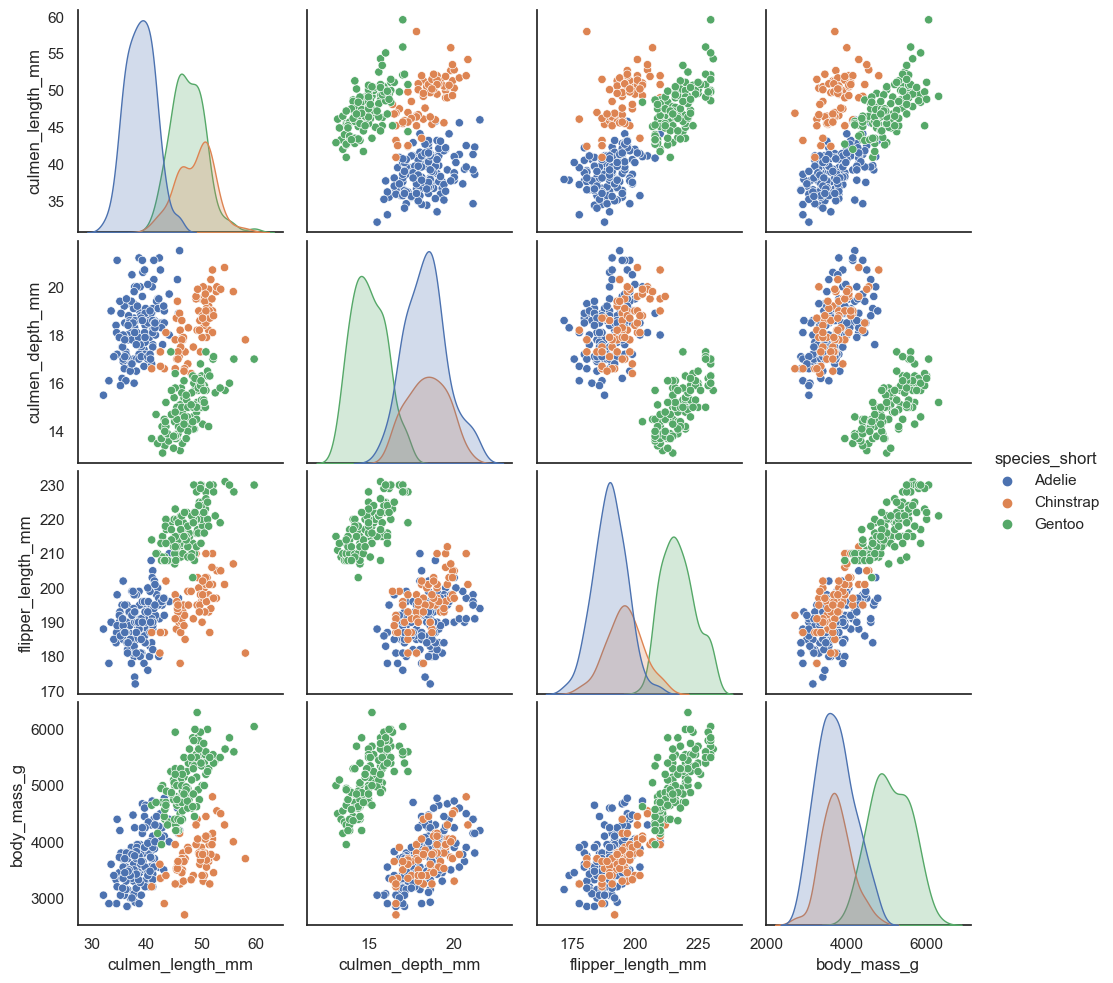

In [18]:
sns.pairplot(penguins, hue='species_short');


Before we can do any work with the data it will help to clean up it a
little. We won't need NAs, we just want the measurement columns, and
since the measurements are on entirely different scales it will be
helpful to convert each feature into z-scores (number of standard
deviations from the mean) for comparability.


In [19]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

We're ready for our analysis. Since we don't want to have to do this work again repeatedly, this is a nice place to save our work (i.e. let Easydata remember the recipe for us), and have the notebook here as a handy reference still if we want to refer back to it. 

## Save the new datasets using this Notebook as a Transformer

#### Default Better Principle: Keep easy-to-use data recipes

We will now save new data as a derived Dataset, say `penguins-clean` and `penguins-scaled`, so that we can access the processed data from anywhere this repo is installed via `Dataset.load()`. For our purposes that will be the next notebook! We'll do it in another notebook to separate the grungy prep work from the analysis itself.

Easydata uses what are called Dataset "Transformers" to record dependencies between Datasets.These Transformers can work as one-to-one, one-to-many, and even many-to-many transformations. 

Often, Transformers are simply python functions that derive one dataset from another. Easydata also has the ability to use a Jupyter Notebook as a Transformer, where the code of this Notebook acts as the function that transforms one dataset into another. 

Using the notebook-as-transformer feature is a nice way to ensure that an analysis is documented and reproducible, and a great way to save a derived dataset for analysis in a different notebook entirely.

Here we will generate a pair of derived datasets and save them to the Easydata Dataset catalog. Make list all the Dataset dependencies when making this call. The "input datasets" are the Datasets the we load in the Notebook via `Dataset.load()`, and the "ouput datasets" are the derived datasets themselves; e.g. the Datasets that we create in the following two cells.

In [20]:
scaled_dataset_name = "penguins-scaled"
scaled_data = scaled_penguin_data
scaled_metadata = ds.metadata.copy() # start with a copy of the same metadata

# add some new metadata description reflecting what we did
scaled_descr_txt = f"""\n\nData cleaned up by removing NAs and scaling. See notebook 04."""

scaled_metadata['descr'] += scaled_descr_txt

scaled_ds = Dataset(dataset_name=scaled_dataset_name, data=scaled_data,
                 metadata=scaled_metadata)

In [21]:
clean_dataset_name = "penguins-clean"
clean_data = penguins
clean_metadata = ds.metadata.copy() # start with a fresh copy of the same metadata


# add some new metadata description reflecting what we did
clean_descr_txt = f"""\n\nData cleaned up by removing NAs. See notebook 04."""

clean_metadata['descr'] += clean_descr_txt

clean_ds = Dataset(dataset_name=clean_dataset_name, data=clean_data,
                 metadata=clean_metadata)

In [22]:
# Due to various design choiced in Jupyter, we need to specify this name manually.
## BUG ALERT: A silly bug crept in right before the tutorial.
## If this cell fails, try running it a second time. 
## Sorry. we'll squash this bug after pydata
nbname = '04-Data-Challenge.ipynb'
dsdict = notebook_as_transformer(notebook_name=nbname,
                                 input_datasets=[ds],
                                 output_datasets=[scaled_ds, clean_ds],
                                 overwrite_catalog=True)

2024-03-29 18:59:32,869 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2024-03-29 18:59:32,869 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2024-03-29 18:59:32,871 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:32,871 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:32,873 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2024-03-29 18:59:32,874 - datasets - DEBUG - Updating hashes for dataset 'penguins-scaled': {'hashes': {'data': 'sha1:4bd9b10eb54cfdbbcdf0fbeba27e9cf6687cc9bb', 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}}.


2024-03-29 18:59:32,874 - helpers - DEBUG - dataset:penguins-scaled already in catalog


2024-03-29 18:59:32,875 - helpers - DEBUG - Hashes match for penguins-scaled. Skipping Overwrite.


2024-03-29 18:59:32,875 - helpers - DEBUG - Writing dataset:penguins-scaled to disk


2024-03-29 18:59:32,876 - datasets - DEBUG - Updating hashes for dataset 'penguins-scaled': {'hashes': {'data': 'sha1:4bd9b10eb54cfdbbcdf0fbeba27e9cf6687cc9bb', 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}}.


2024-03-29 18:59:32,878 - datasets - DEBUG - Wrote Dataset Metadata: penguins-scaled.metadata


2024-03-29 18:59:32,879 - datasets - DEBUG - Wrote Dataset: penguins-scaled.dataset


2024-03-29 18:59:32,880 - helpers - DEBUG - Generating Transformer edge


2024-03-29 18:59:32,880 - catalog - DEBUG - Writing entry:'_penguins-scaled_penguins-clean' to catalog:'transformers'.


2024-03-29 18:59:32,882 - datasets - WARNING - Overwrite_catalog=True but generate=False. Not overwriting Dataset catalog entry for 'penguins-scaled'


2024-03-29 18:59:32,883 - datasets - WARNING - Overwrite_catalog=True but generate=False. Not overwriting Dataset catalog entry for 'penguins-clean'


2024-03-29 18:59:32,886 - datasets - DEBUG - Updating hashes for dataset 'penguins-clean': {'hashes': {'data': 'sha1:67a4b737f8d5f28841372297bbb5623a75250123', 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}}.


2024-03-29 18:59:32,887 - helpers - DEBUG - dataset:penguins-clean already in catalog


2024-03-29 18:59:32,887 - helpers - DEBUG - Hashes match for penguins-clean. Skipping Overwrite.


2024-03-29 18:59:32,888 - helpers - DEBUG - Writing dataset:penguins-clean to disk


2024-03-29 18:59:32,893 - datasets - DEBUG - Updating hashes for dataset 'penguins-clean': {'hashes': {'data': 'sha1:67a4b737f8d5f28841372297bbb5623a75250123', 'target': 'sha1:38f65f3b11da4851aaaccc19b1f0cf4d3806f83b'}}.


2024-03-29 18:59:32,894 - datasets - DEBUG - Wrote Dataset Metadata: penguins-clean.metadata


2024-03-29 18:59:32,896 - datasets - DEBUG - Wrote Dataset: penguins-clean.dataset


2024-03-29 18:59:32,897 - helpers - DEBUG - Generating Transformer edge


2024-03-29 18:59:32,897 - catalog - DEBUG - Writing entry:'_penguins-scaled_penguins-clean' to catalog:'transformers'.


2024-03-29 18:59:32,898 - datasets - WARNING - Overwrite_catalog=True but generate=False. Not overwriting Dataset catalog entry for 'penguins-scaled'


2024-03-29 18:59:32,899 - datasets - WARNING - Overwrite_catalog=True but generate=False. Not overwriting Dataset catalog entry for 'penguins-clean'


Check that we can now load our new dataset from the Dataset Catalog.

In [23]:
new_ds = Dataset.load("penguins-scaled")

2024-03-29 18:59:32,907 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2024-03-29 18:59:32,908 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2024-03-29 18:59:32,910 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:32,910 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:32,983 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2024-03-29 18:59:32,984 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2024-03-29 18:59:32,986 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:32,987 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:32,990 - datasets - DEBUG - Load penguins-scaled from disk...


2024-03-29 18:59:32,991 - datasets - DEBUG - Loaded penguins-scaled from disk.


Let's check that `.data` is the same as expected:

In [24]:
(new_ds.data == scaled_penguin_data).all()

True

And that the `.DESCR` text has been updated the way we stated.

In [25]:
print(new_ds.DESCR)


The goal of palmerpenguins is to provide a great dataset for data exploration & visualization, as an alternative to `iris`.

More information can be found at [https://github.com/allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins).

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The data consists of measurements of bill (culmen) and flippers and weights of three species of penguins, along with some other metadata about the penguins. In total we have 334 different penguins measured.

Data cleaned up by removing NAs and scaling. See notebook 04.


Finally, let's check that the license passed on appropriately:

In [26]:
print(new_ds.LICENSE)


Data are available by [CC-0](https://github.com/allisonhorst/palmerpenguins) license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.



Now when you come back to this environment and want to use this dataset, all you need to do is running `Dataset.load('penguins-clean')`. You don't even have to re-run this notebook. All the work of generating the dataset will be done automatically once your notebook-as-transformer is added to the Dataset catalog.


**Note**:The Dataset Catalog is managed by git. You should see some new, non-checked in files in your catalog related to...you guessed it...penguins! 

If you're participating in the **Bonus Git Challenge**:

* See what has changed by typing `git status`

* Check these catalog changes in now. 

## Complete the challenge
Let's make sure that the data recipes work, that you have successfully created your new (derived) datasets, and that these datasets are now available via Dataset catalog.

**YOUR NEXT TASK**: Run `make data_challenge` once you've worked through this notebook to check that you've completed the challenge and to continue with your reproducibility quest.